*The animal didn't cross the street because it wa too tired




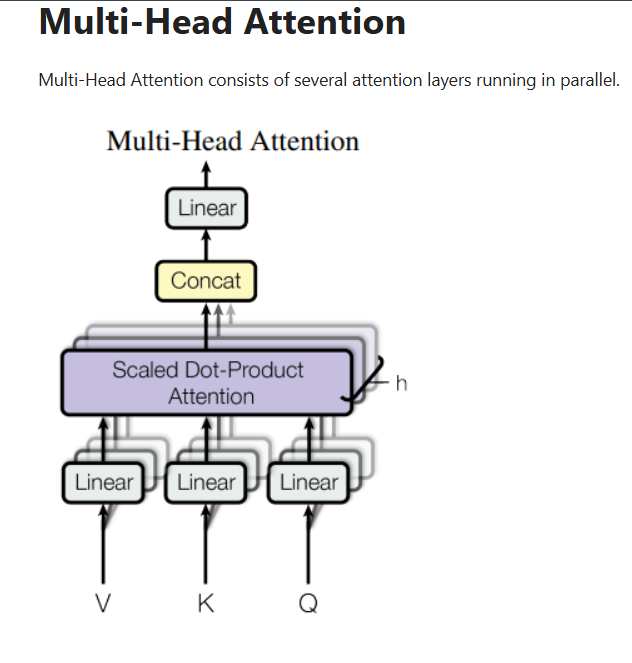

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [2]:
sequence_length=11
batch_size=1
input_dim=512
d_model=512
x=torch.randn((batch_size,sequence_length,input_dim))

x

tensor([[[ 0.9894, -0.3111, -0.5624,  ..., -1.9594,  0.2957, -0.2684],
         [ 0.8299, -1.2796, -0.3715,  ...,  0.1610,  1.7146, -1.1783],
         [ 0.6126, -0.4235,  1.0484,  ...,  0.5170, -0.6357,  0.2561],
         ...,
         [ 1.7074, -2.1545,  1.2595,  ..., -1.3164,  1.2090, -0.1889],
         [ 1.1437, -0.8645, -0.1888,  ..., -0.9004, -1.5365,  0.2940],
         [ 0.8116,  0.7950,  0.6059,  ...,  0.4299, -0.1564,  0.4454]]])

In [6]:
x.shape #9batch size,tokens,embeddings)

torch.Size([1, 11, 512])

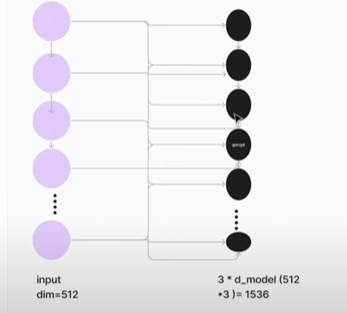

In [8]:
qkv_layer=nn.Linear(input_dim,3*d_model)  #q=512,v=512,k=512
qkv_layer

Linear(in_features=512, out_features=1536, bias=True)

In [10]:
qkv=qkv_layer(x)
qkv.shape

torch.Size([1, 11, 1536])

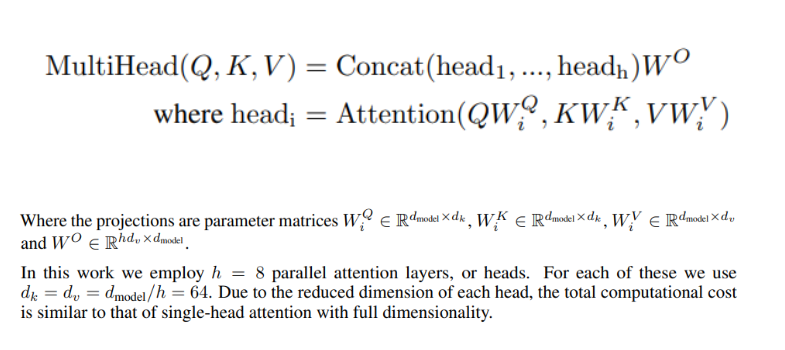

In [16]:
num_heads=8 #can be switched between 8 and 16 for optimal performance
head_dim=d_model//num_heads
head_dim

64

In [28]:
#reshaping
qkv=qkv.reshape(batch_size,sequence_length,num_heads,3*head_dim)
qkv.shape


torch.Size([1, 11, 8, 192])

In [29]:
qkv=qkv.permute(0,2,1,3) #so that parallel operation on the last 2 inpuuts gets easier
qkv.shape

torch.Size([1, 8, 11, 192])

In [31]:
q,k,v=qkv.chunk(3,dim =- 1)
q.shape,k.shape,v.shape

(torch.Size([1, 8, 11, 64]),
torch.Size([1, 8, 11, 64]),
torch.Size([1, 8, 11,64]))

(torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]))

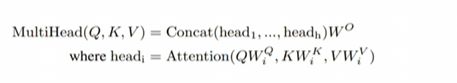